In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electronic-products-prices/DatafinitiElectronicsProductsPricingData.csv


In [2]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/electronic-products-prices/DatafinitiElectronicsProductsPricingData.csv'
data = pd.read_csv(file_path)

# Display the first few rows and the summary of the dataset
data.head(), data.info(), data.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14592 entries, 0 to 14591
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   14592 non-null  object 
 1   prices.amountMax     14592 non-null  float64
 2   prices.amountMin     14592 non-null  float64
 3   prices.availability  12667 non-null  object 
 4   prices.condition     13189 non-null  object 
 5   prices.currency      14592 non-null  object 
 6   prices.dateSeen      14592 non-null  object 
 7   prices.isSale        14592 non-null  bool   
 8   prices.merchant      13820 non-null  object 
 9   prices.shipping      8793 non-null   object 
 10  prices.sourceURLs    14592 non-null  object 
 11  asins                14592 non-null  object 
 12  brand                14592 non-null  object 
 13  categories           14592 non-null  object 
 14  dateAdded            14592 non-null  object 
 15  dateUpdated          14592 non-null 

(                     id  prices.amountMax  prices.amountMin  \
 0  AVphzgbJLJeJML43fA0o            104.99            104.99   
 1  AVpgMuGwLJeJML43KY_c             69.00             64.99   
 2  AVpgMuGwLJeJML43KY_c             69.00             69.00   
 3  AVpgMuGwLJeJML43KY_c             69.99             69.99   
 4  AVpgMuGwLJeJML43KY_c             66.99             66.99   
 
   prices.availability prices.condition prices.currency  \
 0                 Yes              New             USD   
 1            In Stock              New             USD   
 2            In Stock              New             USD   
 3                 Yes              New             USD   
 4                 Yes              New             USD   
 
                                      prices.dateSeen  prices.isSale  \
 0  2017-03-30T06:00:00Z,2017-03-10T22:00:00Z,2017...          False   
 1                               2017-12-14T06:00:00Z           True   
 2                               2017-09-0

In [3]:
# Remove irrelevant columns
columns_to_drop = ['Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30']
data_cleaned = data.drop(columns=columns_to_drop, errors='ignore')

# Check for remaining columns with missing values and their count
missing_data = data_cleaned.isnull().sum()
missing_data = missing_data[missing_data > 0]  # Filter columns with missing values

missing_data


prices.availability     1925
prices.condition        1403
prices.merchant          772
prices.shipping         5799
ean                    10384
manufacturer            6974
dtype: int64

In [4]:
# Fill missing categorical values with 'Unknown'
categorical_columns = ['prices.availability', 'prices.condition', 'prices.merchant', 'prices.shipping', 'manufacturer']
data_cleaned[categorical_columns] = data_cleaned[categorical_columns].fillna('Unknown')

# Verify handling of missing values
missing_data_after = data_cleaned.isnull().sum()
missing_data_after = missing_data_after[missing_data_after > 0]  # Filter columns with remaining missing values

missing_data_after


ean    10384
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


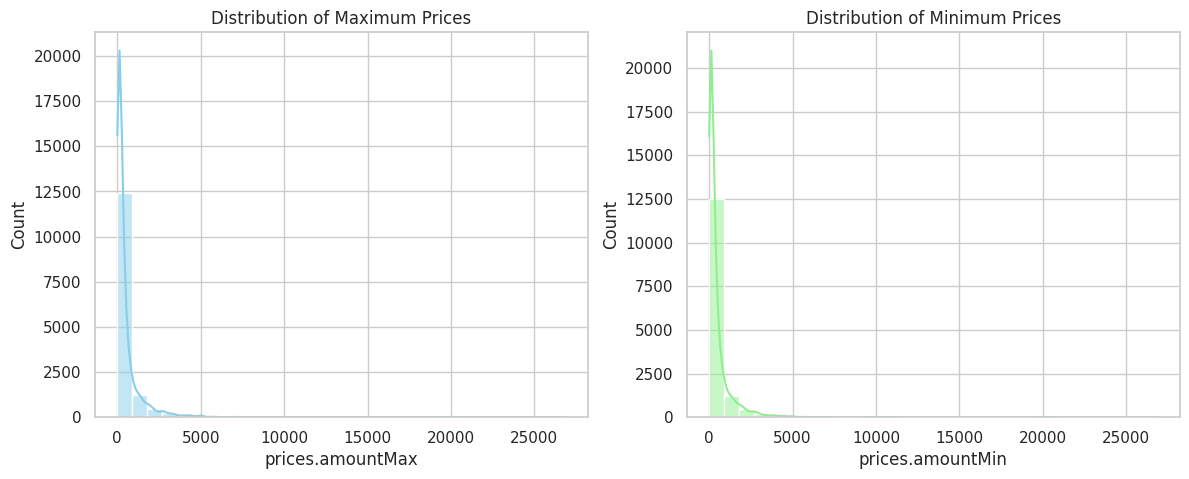

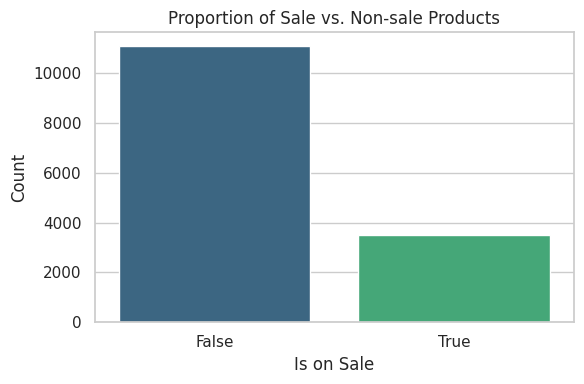

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting aesthetic parameters for seaborn
sns.set(style="whitegrid")

# 1. Distribution of Prices
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(data_cleaned['prices.amountMax'], bins=30, ax=axes[0], color='skyblue', kde=True)
axes[0].set_title('Distribution of Maximum Prices')
sns.histplot(data_cleaned['prices.amountMin'], bins=30, ax=axes[1], color='lightgreen', kde=True)
axes[1].set_title('Distribution of Minimum Prices')

# 2. Sale vs. Non-sale Products
plt.figure(figsize=(6, 4))
sale_counts = data_cleaned['prices.isSale'].value_counts()
sns.barplot(x=sale_counts.index, y=sale_counts, palette='viridis')
plt.title('Proportion of Sale vs. Non-sale Products')
plt.xlabel('Is on Sale')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


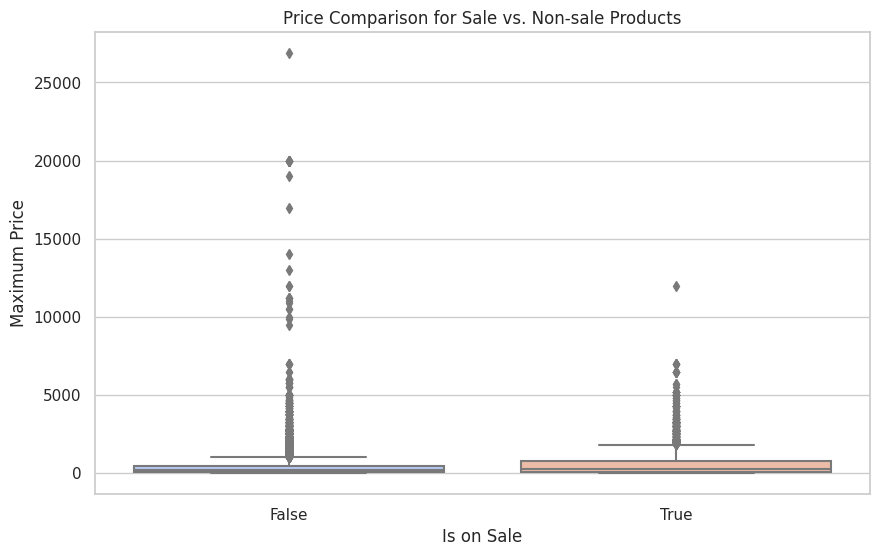

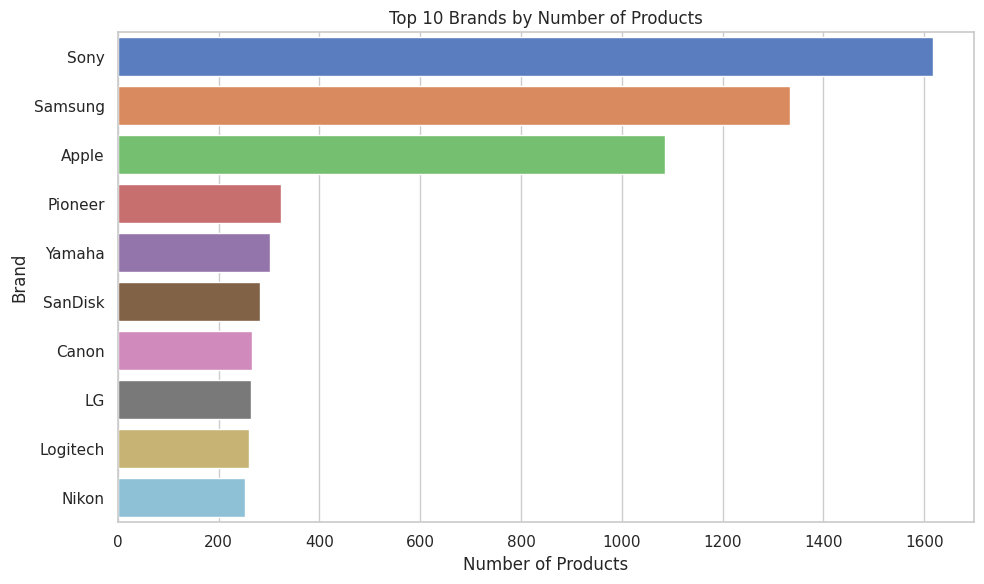

In [6]:
# 3. Price Comparison for Sale vs. Non-sale
plt.figure(figsize=(10, 6))
sns.boxplot(x='prices.isSale', y='prices.amountMax', data=data_cleaned, palette='coolwarm')
plt.title('Price Comparison for Sale vs. Non-sale Products')
plt.xlabel('Is on Sale')
plt.ylabel('Maximum Price')

# 4. Top Brands by Number of Products
plt.figure(figsize=(10, 6))
top_brands = data_cleaned['brand'].value_counts().head(10)
sns.barplot(x=top_brands, y=top_brands.index, palette='muted')
plt.title('Top 10 Brands by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Brand')

plt.tight_layout()
plt.show()


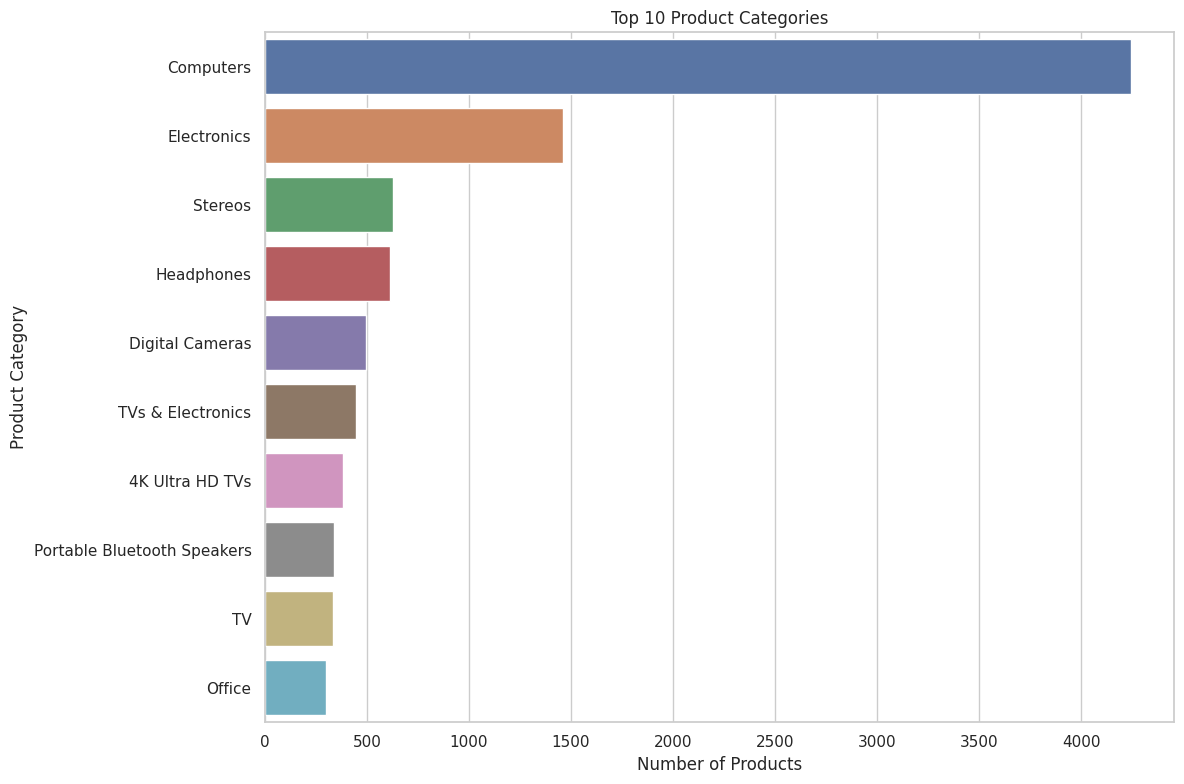

In [7]:
# 5. Product Categories Analysis
# Extracting the primary category from the 'categories' column for simplicity in visualization
data_cleaned['primary_category'] = data_cleaned['categories'].apply(lambda x: x.split(',')[0])

# Plotting the top categories
plt.figure(figsize=(12, 8))
top_categories = data_cleaned['primary_category'].value_counts().head(10)
sns.barplot(x=top_categories, y=top_categories.index, palette='deep')
plt.title('Top 10 Product Categories')
plt.xlabel('Number of Products')
plt.ylabel('Product Category')

plt.tight_layout()
plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Selecting features and target
features = data_cleaned[['prices.amountMax', 'prices.amountMin', 'brand', 'primary_category']]
target = data_cleaned['prices.isSale']

# Encoding categorical variables and scaling numerical variables
categorical_features = ['brand', 'primary_category']
numerical_features = ['prices.amountMax', 'prices.amountMin']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Creating the pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Training the model
model.fit(X_train, y_train)

# Scoring the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

train_score, test_score


(0.9701876124389617, 0.7708119218910586)

In [9]:
from sklearn.model_selection import GridSearchCV

# Parameters for tuning
param_grid = {
    'classifier__n_estimators': [100, 200],  # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20],  # Maximum depth of each tree
}

# Creating the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', verbose=1)

# Fitting GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_test_score = grid_search.score(X_test, y_test)

best_params, best_score, best_test_score


Fitting 3 folds for each of 6 candidates, totalling 18 fits


({'classifier__max_depth': 20, 'classifier__n_estimators': 100},
 0.7751220765869956,
 0.7732100034258308)

In [10]:
def analyze_and_mark_top_products(data_new, model):
    # Predict sales
    data_new = data_new.copy()  # To avoid modifying the original dataframe outside the function
    features_new = data_new[['prices.amountMax', 'prices.amountMin', 'brand', 'primary_category']]
    sale_predictions = model.predict(features_new)
    data_new['predicted_isSale'] = sale_predictions
    
    # Determine top sold brands
    top_sold_brands = data_new[data_new['predicted_isSale']]['brand'].value_counts().head(10)
    top_sold_brands = top_sold_brands.index.tolist()
    
    # Mark top search products
    data_new['top_search_brand'] = data_new['brand'].apply(lambda x: "Top Search" if x in top_sold_brands else "Regular")
    
    return data_new

# Using a subset of the existing cleaned data as "new" data
subset_data = data_cleaned.sample(n=500, random_state=42)  # Simulate new data by sampling

# Apply the function
result_data = analyze_and_mark_top_products(subset_data, model)
result_data[['brand', 'predicted_isSale', 'top_search_brand']].head()


,brand,predicted_isSale,top_search_brand
4676,Samsung,True,Top Search
8852,Asus,False,Regular
907,Samsung,True,Top Search
14090,Seagate,False,Regular
11947,Canon,False,Regular


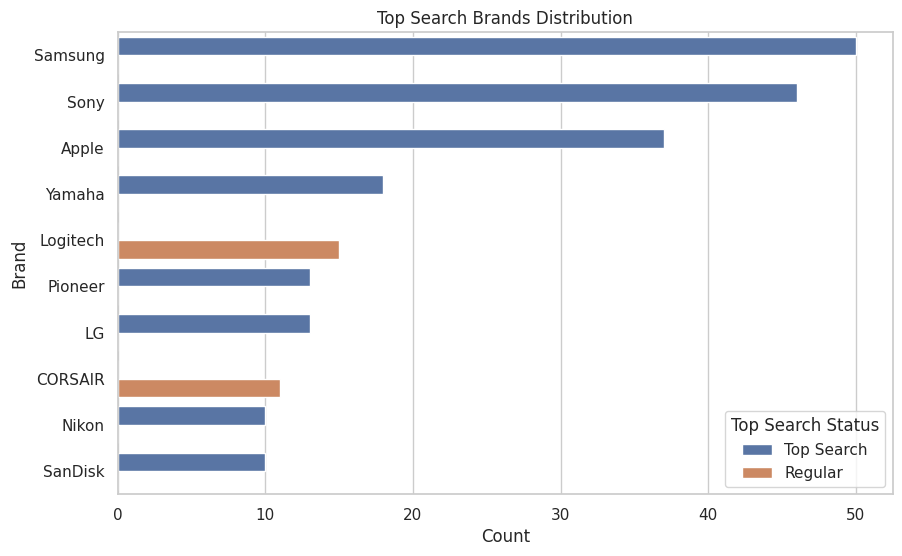

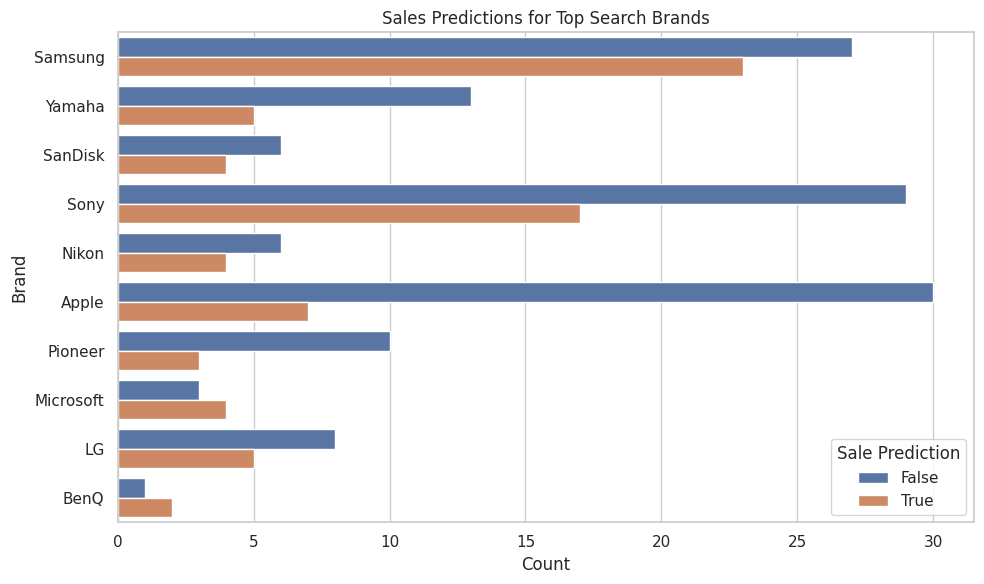

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_top_search_brands(data):
    # Visualization of Top Search Brands Distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, y='brand', hue='top_search_brand', order=data['brand'].value_counts().head(10).index)
    plt.title('Top Search Brands Distribution')
    plt.xlabel('Count')
    plt.ylabel('Brand')
    plt.legend(title='Top Search Status')

    # Visualization of Sales Predictions for Top Search Brands
    plt.figure(figsize=(10, 6))
    top_search_data = data[data['top_search_brand'] == 'Top Search']
    sns.countplot(data=top_search_data, y='brand', hue='predicted_isSale')
    plt.title('Sales Predictions for Top Search Brands')
    plt.xlabel('Count')
    plt.ylabel('Brand')
    plt.legend(title='Sale Prediction')

    plt.tight_layout()
    plt.show()

visualize_top_search_brands(result_data)
